In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [4]:

DataFrame = pd.read_excel("Lab4-data.xlsx")
DataFrame

,x1,x2,y
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [5]:
DataFrame.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [6]:
X=DataFrame.iloc[:, 0:1]
Y=DataFrame.iloc[:, 2:]
X


,x1
0,1056
1,2600
2,1440
3,1521
4,1200
5,1170
6,2732
7,3300
8,1310
9,3700


In [7]:
Y

,y
0,39.07
1,120.00
2,62.00
3,75.00
4,51.00
5,38.00
6,135.00
7,155.00
8,50.00
9,167.00


In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X)
x

array([[-0.90830532],
       [ 0.92385017],
       [-0.45263971],
       [-0.35652274],
       [-0.73743072],
       [-0.7730296 ],
       [ 1.08048522],
       [ 1.75449061],
       [-0.60690151],
       [ 2.22914229],
       [-0.0254532 ],
       [ 1.14337657],
       [-0.97475656],
       [-0.85609364],
       [ 0.50852995],
       [-0.76709645],
       [-0.7611633 ],
       [-0.33397679],
       [ 1.12557713],
       [-1.2120824 ]])

In [9]:
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.3,random_state=8)

In [11]:
regr = linear_model.LinearRegression()

regr.fit(X_train, Y_train)

y_pred = regr.predict(X_test)
print('y pred', y_pred);

y pred [[151.29492527]
 [125.99174568]
 [123.38772914]
 [ 46.88860172]
 [125.25475987]
 [ 48.11691141]]


In [12]:
from sklearn.metrics import r2_score
r2_score(Y_test, y_pred)*100

92.0294279659054

In [13]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(Y_test,y_pred))

MSE 152.96634757321164


In [14]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(Y_test,y_pred))

MAE 10.058675014502453


In [15]:
print("RMSE",np.sqrt(mean_squared_error(Y_test,y_pred)))

RMSE 12.36795648331654


Stostatic Gradient Descent

In [16]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, Y_train)
yprey=reg.predict(X_test)

c:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance

In [17]:
yprey

array([150.88438593, 125.65073943, 123.05387872,  46.76497075,
       124.91577885,  47.98990504])

Batch Gradient Descent


In [18]:
# Hypothesis Function
def hypo(theta_arr, x):
    return theta_arr[0] + theta_arr[1]*x


In [19]:
#Cost Function
def cost(theta_arr, x, y,n):
    return (1/(2*n)) * np.sum((hypo(theta_arr, x) - y)**2)

In [20]:
# Batch Descent Function
n = len(X)
def gradient_descent(theta_arr, x, y, iterations, alpha):
    cost_arr = []
    i = 0
    while i < iterations:
        hx = hypo(theta_arr, x)
        theta_arr[0] -= alpha*(np.sum(hx-y))/n
        theta_arr[1] -= (alpha * np.sum((hx - y) * x))/n
        cost_arr.append(cost(theta_arr, x, y,n))
        i += 1
    return theta_arr, cost_arr

In [21]:

def predict(theta_arr, x, y, iterations, alpha):
  theta_arr, cost_arr = gradient_descent(theta_arr, X_train, Y_train, iterations, alpha)
  return hypo(theta_arr, x), cost_arr, theta_arr

In [22]:
theta_arr = np.random.rand(2)
y_bar, cost, theta = predict(theta_arr, x, Y, 100, 0.001)

In [23]:
print(theta)

[5.45577936 1.38764844]


In [24]:
print(y_bar)

[[4.1953709 ]
 [6.7377586 ]
 [4.82767458]
 [4.96105113]
 [4.43248478]
 [4.38308605]
 [6.95511299]
 [7.89039551]
 [4.61361344]
 [8.54904518]
 [5.42045928]
 [7.04238407]
 [4.10315995]
 [4.26782236]
 [6.16144015]
 [4.39131918]
 [4.3995523 ]
 [4.99233699]
 [7.01768471]
 [3.77383512]]


Ephocs vs Cost graph

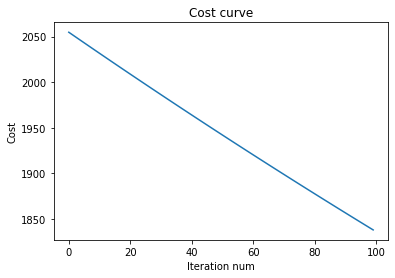

In [25]:
import seaborn
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(cost))], cost)
plt.title("Cost curve")
plt.xlabel("Iteration num")
plt.ylabel("Cost")
plt.show()

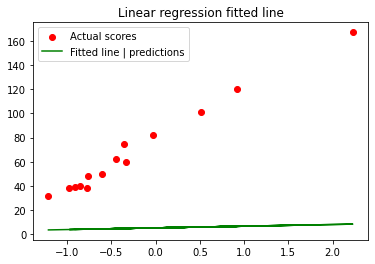

In [26]:
plt.scatter(X_train, Y_train, c='r', label='Actual scores')
plt.plot(x, y_bar, c='g', label='Fitted line | predictions')
plt.legend()
plt.title("Linear regression fitted line")
plt.show()